Amazon DATA_ANALYSE_PROJECT
This dataset contains over 1,400+ ratings and comments for Amazon products, with all details compiled based on information listed on the official Amazon website.
RunnianLU et YifanXiang

Amazon Sales Dataset Columns Names：
product_id - Product ID
product_name - Name of the Product
category - Category of the Product
discounted_price - Discounted Price of the Product
actual_price - Actual Price of the Product
discount_percentage - Percentage of Discount for the Product
rating - Rating of the Product
rating_count - Number of people who voted for the Amazon rating
about_product - Description about the Product
user_id - ID of the user who wrote review for the Product
user_name - Name of the user who wrote review for the Product
review_id - ID of the user review
review_title - Short review
review_content - Long review
img_link - Image Link of the Product
product_link - Official Website Link of the Product

# Data Organization and Cleaning Section__Runnian Lu

Libraries:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Reading data and examining the basic data structure
The purpose of previewing is to quickly scan data, identify potential issues or key areas of focus.

In [25]:
df = pd.read_csv("amazon.csv")
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

print(df.shape)
df.head()

The Number of Rows are 1465, and columns are 16.
(1465, 16)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [26]:
# 快速了解 DataFrame（df）的基本信息。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

All columns are recognized as object type (i.e., strings).
However, columns like discounted_price, actual_price, discount_percentage, rating, and rating_count should actually be numeric types (float/int).
This indicates that before further analysis, these columns must first be converted from strings to numeric values.

In [27]:
# 检查缺失值情况，对每一列统计 “NaN（空值）” 的数量。
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

There are a few missing values in the dataset, which we will read in detail and deal with later on in the notebook.

Data Exploration and Cleaning:

In [28]:
# Convert the original “string-type price / discount / rating” columns into true numerical (float) types to facilitate subsequent calculations, plotting, and clustering.

df['discounted_price'] = df['discounted_price'].str.replace("₹", '') # Remove currency symbols
df['discounted_price'] = df['discounted_price'].str.replace(",", '') # Remove the decimal separator
df['discounted_price'] = df['discounted_price'].astype('float64') # Convert to numeric type float64

df['actual_price'] = df['actual_price'].str.replace("₹", '')
df['actual_price'] = df['actual_price'].str.replace(",", '')
df['actual_price'] = df['actual_price'].astype('float64')

df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype('float64')
df['discount_percentage'] = df['discount_percentage'] / 100 # Remove the percent sign and convert to a decimal

# Check for any abnormal or non-numeric strings.
for col in ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()




--- discounted_price ---
discounted_price
199.0     53
299.0     46
399.0     36
499.0     34
349.0     31
          ..
5865.0     1
85.0       1
2669.0     1
759.0      1
1110.0     1
Name: count, Length: 550, dtype: int64

--- actual_price ---
actual_price
999.0      120
499.0       71
1999.0      56
1499.0      37
399.0       34
          ... 
3290.0       1
1440.0       1
10995.0      1
4780.0       1
11495.0      1
Name: count, Length: 449, dtype: int64

--- discount_percentage ---
discount_percentage
0.50    56
0.60    56
0.00    49
0.80    37
0.55    36
        ..
0.07     2
0.02     2
0.89     1
0.94     1
0.09     1
Name: count, Length: 92, dtype: int64

--- rating ---
rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
3.0      3
4.8      3
5.0      3
2.8      2
3.2      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      

In [29]:
# Check the strange row in rating
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


Since we only see this single row of data, we choose to delete it directly (simple and with minimal impact).

In [30]:
# delete it
df = df[df['rating'] != '|']
df['rating'] = df['rating'].astype(float)

In [31]:
# Il y a une remarque qui dit que le nombre de notes a des virgules, donc il faut les enlever comme int.
# Changing 'rating_count' Column Data Type

df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1462 non-null   float64
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non-null   object

Data Characteristics Overview
Quickly visualize key characteristics of a dataset, including numerical feature distribution, central tendency, dispersion, and range.

In [32]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1464.000000,1464.000000,1464.000000,1464.000000,1462.000000
mean,3126.011906,5447.002923,0.477131,4.096585,18307.376881
std,6946.625442,10878.270001,0.216274,0.291674,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,323.750000,800.000000,0.320000,4.000000,1191.500000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4303.750000,0.630000,4.300000,17342.250000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


快速了解数据整体分布
（有没有异常值？极端高价？评分偏低？）

判断是否需要标准化
聚类和PCA需要让不同单位的数据可比较。
例如价格是几千，而折扣是0~1，量级不同 → 必须标准化。

初步发现异常或潜在问题
例如 max 值（₹139900）明显高于平均值 → 可能是异常产品或高端类别。

Dealing with the missing values
We have identified two NaN values in the rating_count array. We will now proceed to address them.

In [33]:
df.isnull().sum()
# Find missing values percentage in the data
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False) 

rating_count           0.14
product_id             0.00
category               0.00
product_name           0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64

In [34]:
# Find total number of missing values
df.isnull().sum().sum()

np.int64(2)

Missing Value Visualization Analysis (Missing Value Heatmap)

<Axes: >

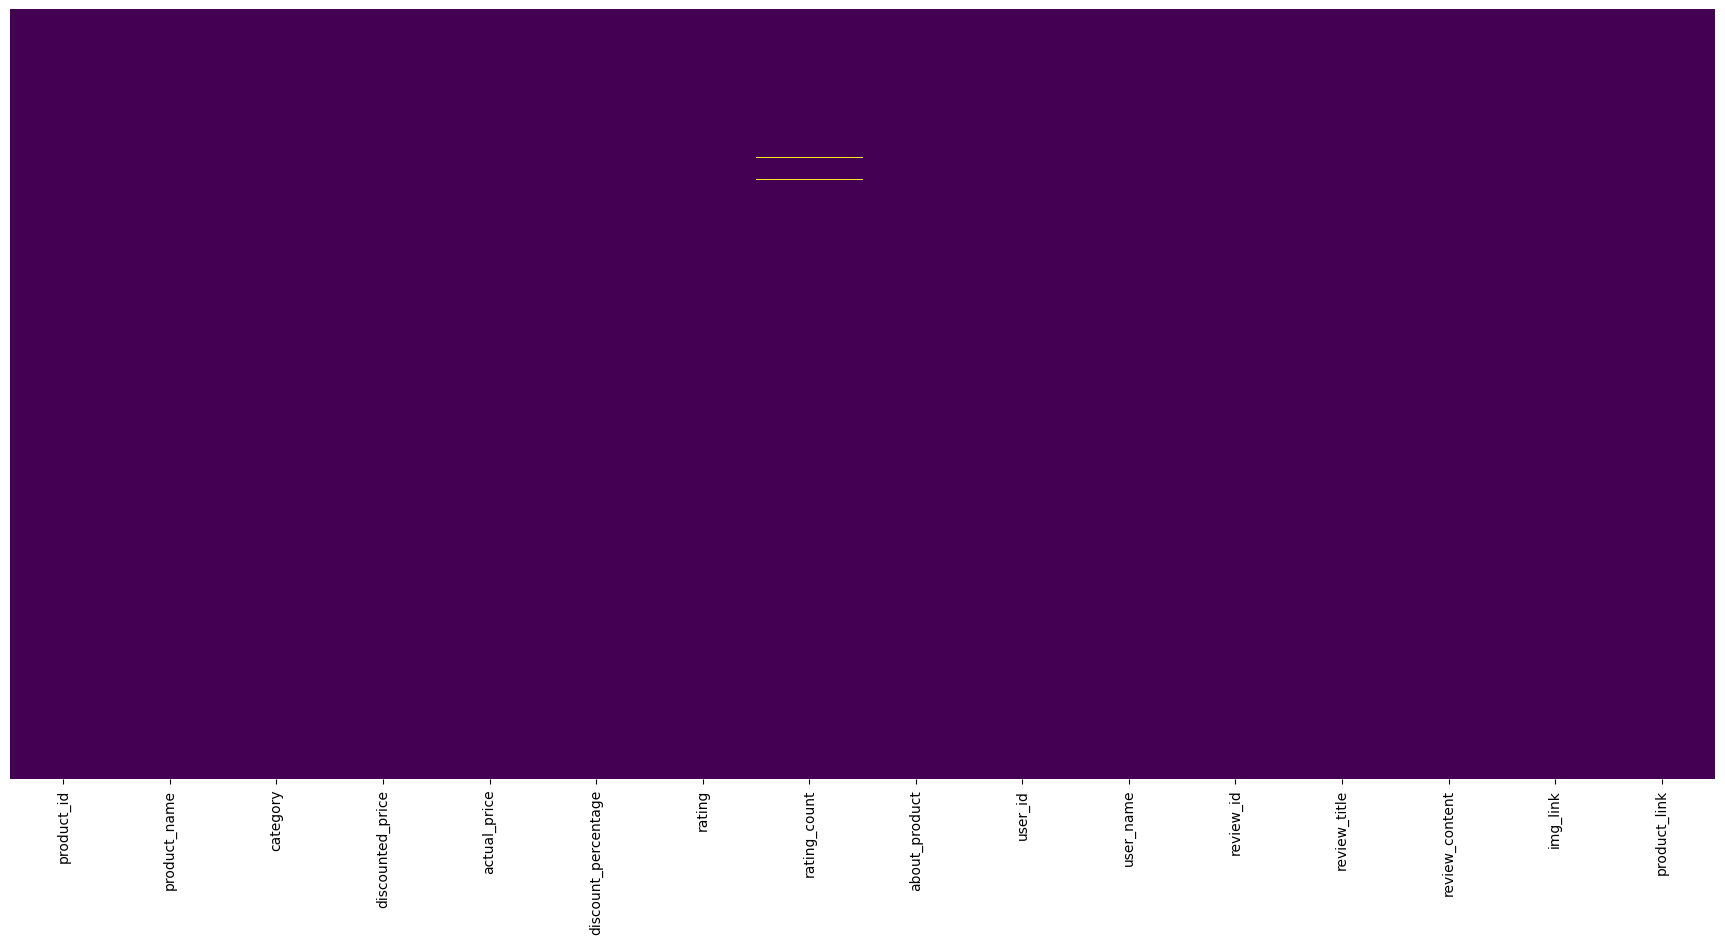

In [35]:
# Use a heatmap to display which columns and rows in the dataset contain NaN/missing values.
plt.figure(figsize=(22, 10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')


There are almost no missing values in the data, with only a few cells (such as the rating_count column) containing null values.
This result is identical to the previous df.isnull().sum() output (only 2 missing values).

In [36]:
# viewing the rows where there are null
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


We chose to replace missing values with the median of this column.
Because the distribution of rating_count is highly skewed—some products have only a few reviews while others have hundreds of thousands—the mean is skewed upward by extreme outliers.
Therefore, the median better represents the typical number of reviews for a product.

In [37]:
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [38]:
# Verify again whether the repair was successful.
df.isnull().sum().sort_values(ascending=False)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Now that we have cleaned the missing values and outliers from the dataset, the data cleaning process is complete.
Next, we will proceed with the data visualization analysis.

# Data visualization analysis__Yifan Xiang

In this section, we aim to explore the cleaned Amazon product dataset through various visualizations.
By using descriptive charts and plots, we can better understand the overall distribution and relationships between key features such as product prices, discounts, ratings, and categories.
This exploratory analysis will help reveal potential trends, correlations, and insights that could guide further model-based analysis or business decisions.

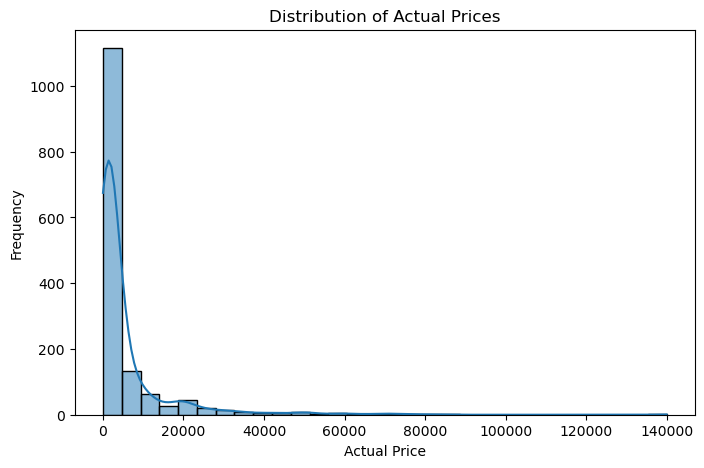

In [39]:
# Plot distribution of actual_price
plt.figure(figsize=(8,5))
sns.histplot(df['actual_price'], bins=30, kde=True)
plt.title("Distribution of Actual Prices")
plt.xlabel("Actual Price")
plt.ylabel("Frequency")
plt.show()

Price distribution typically skews toward the lower end, indicating that most products are concentrated in the mid-to-low price range.
The presence of long tails (extremely high-priced products) indicates that a small portion of premium products exist on the platform.

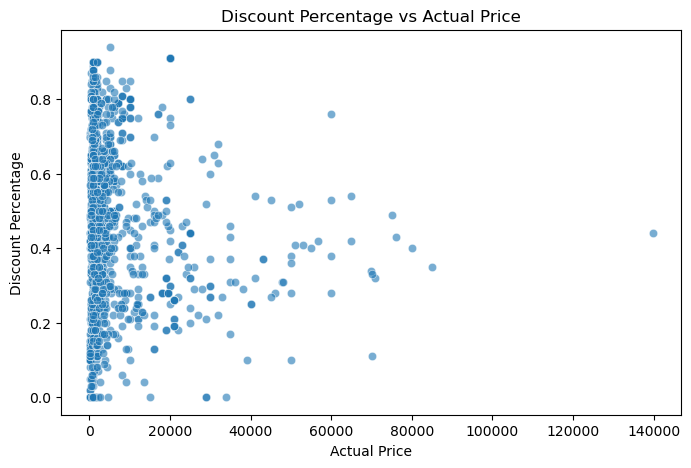

In [40]:
# Discount Rate vs. Actual Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='actual_price', y='discount_percentage', alpha=0.6)
plt.title("Discount Percentage vs Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Discount Percentage")
plt.show()

The scatter plot shows that most products are priced below 20,000, indicating a concentration in the low-to-mid price range.
The discount percentages are distributed quite randomly across different price levels, suggesting that discount rates are not directly related to the product price.
In other words, both low-priced and high-priced items can have significant discounts, but heavy discounts are more common among low-cost products.

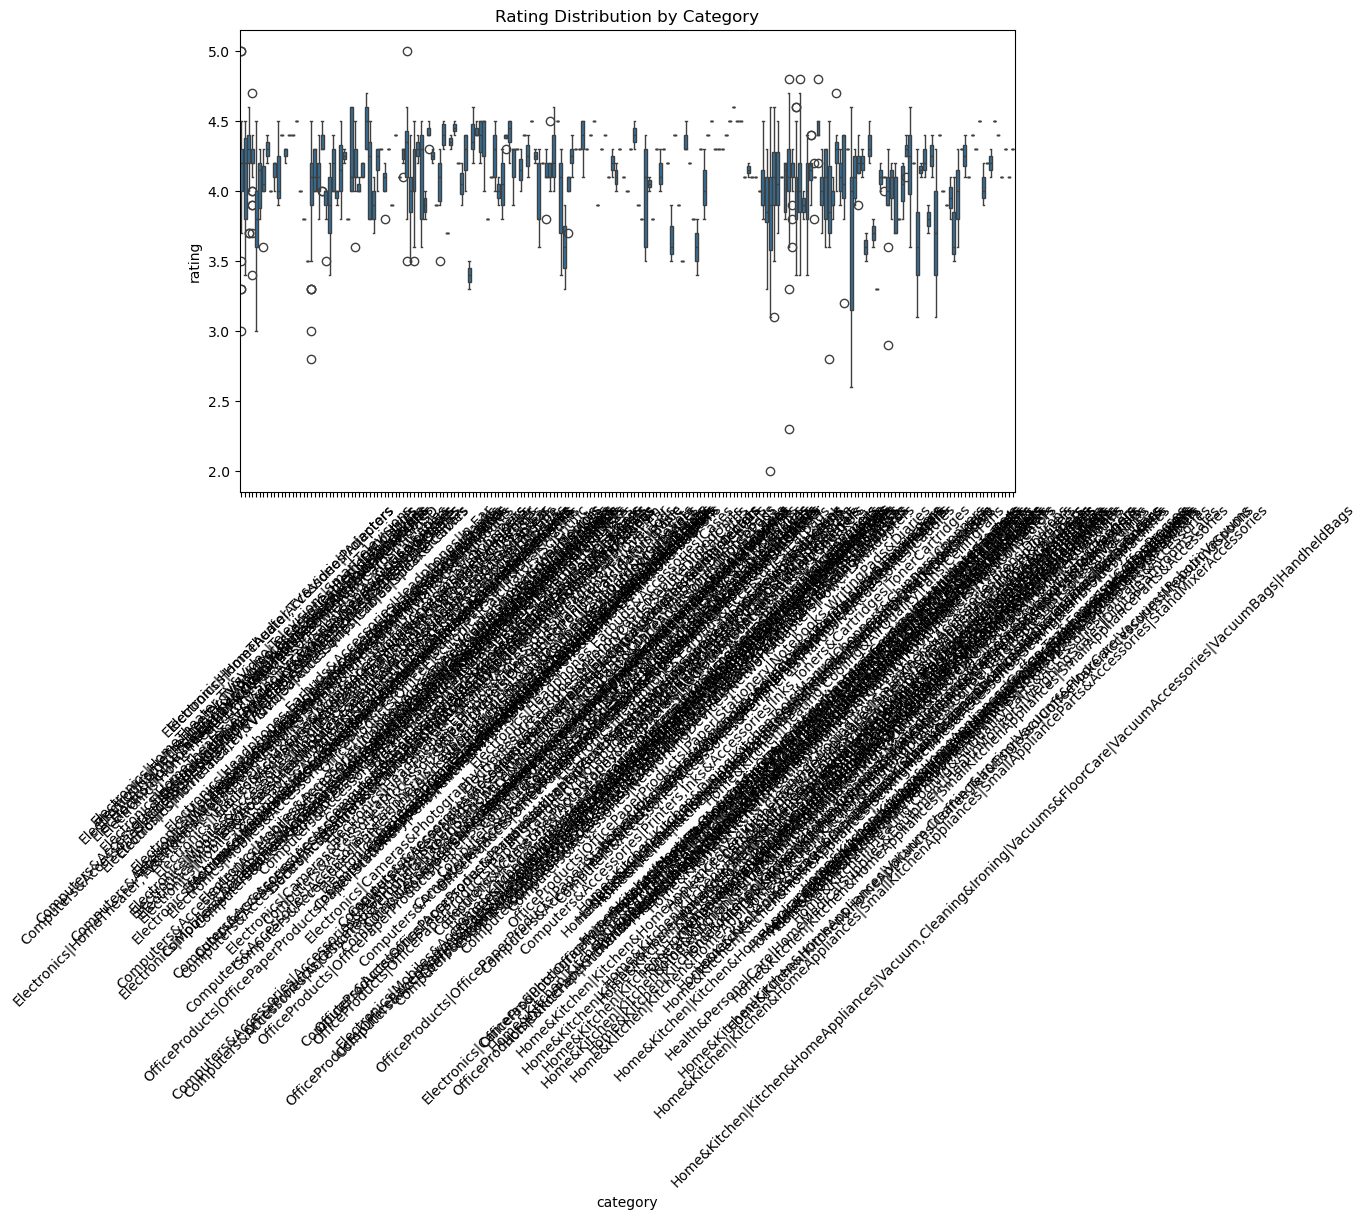

In [41]:
# Category Comparison (Performance Across Different Product Types)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category', y='rating')
plt.xticks(rotation=45)
plt.title("Rating Distribution by Category")
plt.show()

In cases like this where there are many categories (the category column contains dozens or even hundreds of distinct values), displaying them horizontally in a boxplot can indeed become very cluttered and difficult to read. So we choose the bar chart to watch the average rating by category on top 15.

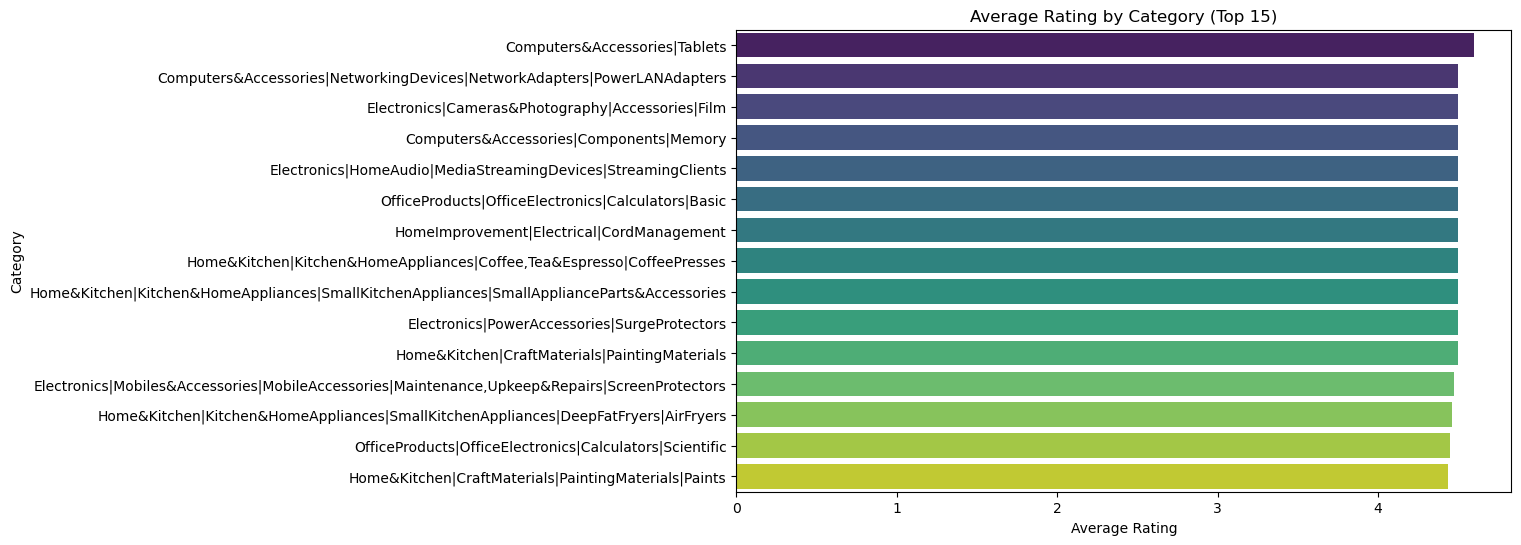

In [42]:
plt.figure(figsize=(10,6))
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_rating.values, y=avg_rating.index, hue=avg_rating.index,
            dodge=False, legend=False, palette='viridis')

plt.title("Average Rating by Category (Top 15)")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()

Users generally express satisfaction with electronic products (particularly tablets and networking devices), while traditional or more functional categories (such as office supplies and art materials) tend to receive more moderate ratings.

# Correlation Analysis / Heatmap Interpretation_Yifan
In this section, we explore the relationships between key numerical variables in the dataset using correlation analysis and heatmap visualization.
The correlation matrix helps identify how strongly different features are linearly related, such as between product prices, discounts, and customer ratings.
By visualizing these correlations, we can detect potential dependencies, redundancy among variables, or independent patterns that may influence customer satisfaction and product pricing strategies.

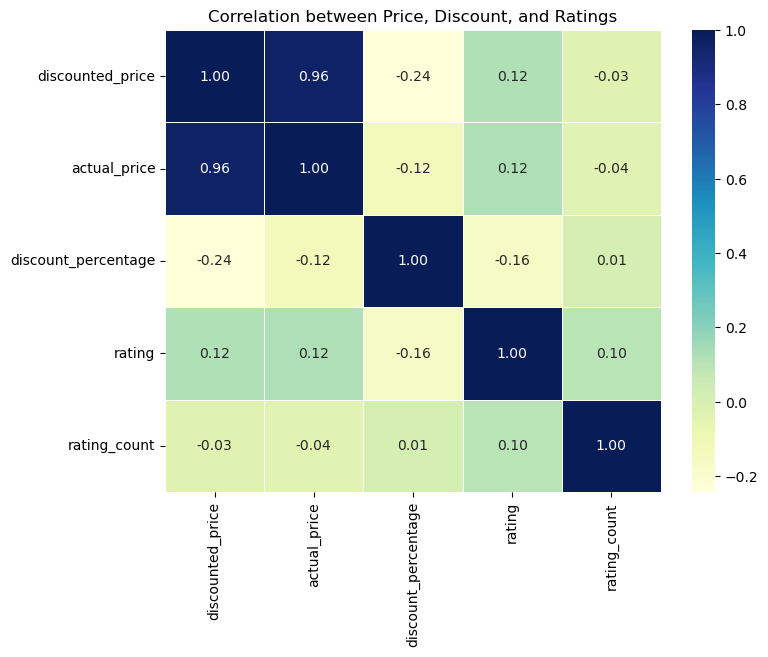

In [43]:
#Correlation between Price, Discount, and Ratings
cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
plt.figure(figsize=(8,6))
sns.heatmap(df[cols].corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Price, Discount, and Ratings")
plt.show()


We excluded columns (product_id, user_name, review_content, img_link, etc.) because they are non-numeric or non-unique fields lacking a calculable linear relationship. They are unsuitable for Pearson correlation calculations and should therefore not be included in the correlation analysis.

The retained five numeric variables represent the aspects most reflective of the business relationship.


We can see the price-related variables are strongly correlated with each other but show little to no correlation with rating variables, indicating that customer satisfaction is not driven by pricing factors.

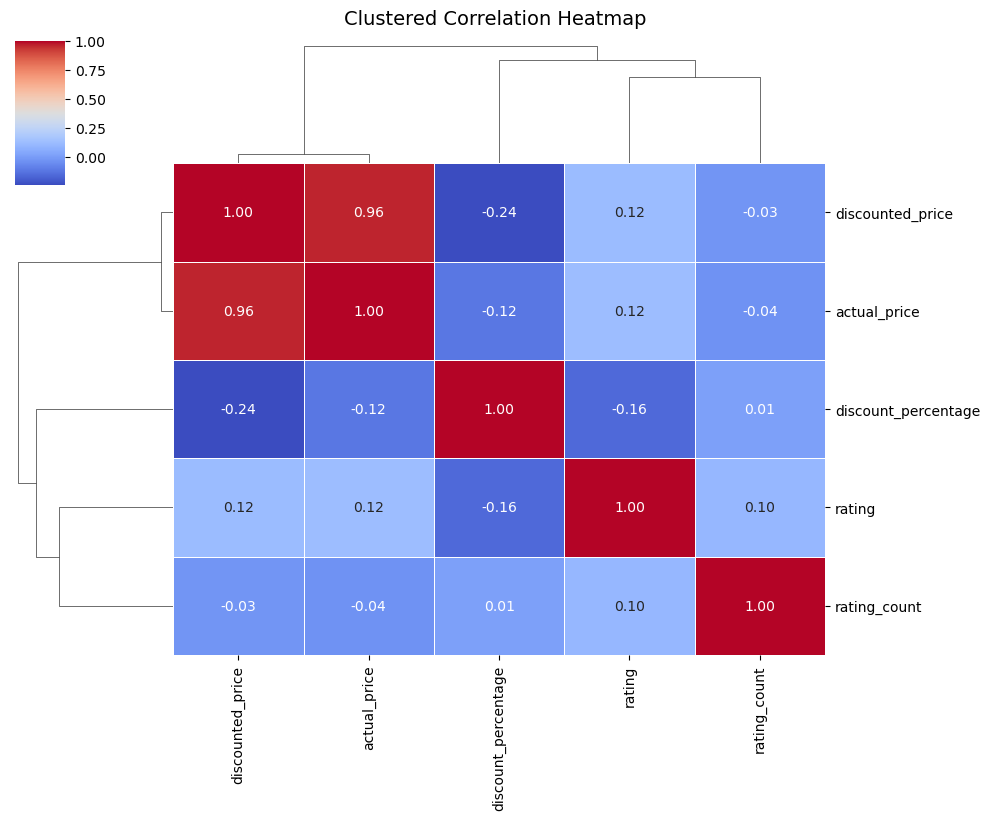

In [44]:
#Clustered Correlation Heatmap
sns.clustermap(
    df.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    figsize=(10,8),
    linewidths=0.4
)
plt.suptitle("Clustered Correlation Heatmap", y=1.02, fontsize=14)
plt.show()


This is the version with hierarchical clustering.
In addition to displaying correlations, it automatically groups highly correlated variables together and visualizes their similarity using a dendrogram.

The two branches in the upper left are very short → discounted_price and actual_price are extremely close (highly correlated).

discount_percentage forms its own branch → slightly distinct from price features.

rating and rating_count cluster into another branch → indicating they belong to the “user behavior” feature group.

For subsequent feature selection or dimensionality reduction (e.g., performing PCA or variable screening prior to model input)

After exploring the dataset visually, we now move forward to model-based analysis to uncover deeper relationships between the key variables.